In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [8, 16]

In [30]:
X = pd.read_table("War13_X.csv", delimiter=";").select_dtypes(include=[np.number]).to_numpy()
Xprime = pd.read_table("War13_Xprime.csv", delimiter=";", decimal=",").select_dtypes(include=[np.number]).to_numpy()


In [31]:
def DMD(X,Xprime,r):
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = np.linalg.eig(Atilde) # Step 3
    Lambda = np.diag(Lambda)

    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T @ W # Step 4
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1)
    return Phi, Lambda, b

In [51]:
Phi, Lambda, b = DMD(X[:,:-1],X[:,1:],21)

print("Parametry kształtu Phi:", Phi.shape)

Parametry kształtu Phi: (22, 2)


In [48]:
## Plot Mode 2
vortmin = -5
vortmax = 5
V2 = np.copy(np.real(np.reshape(Phi[:,1],(11,2))))
V2 = V2.T

# normalize values... not symmetric
minval = np.min(V2)
maxval = np.max(V2)

if np.abs(minval) < 5 and np.abs(maxval) < 5:
    if np.abs(minval) > np.abs(maxval):
        vortmax = maxval
        vortmin = -maxval
    else:
        vortmin = minval
        vortmax = -minval

V2[V2 > vortmax] = vortmax
V2[V2 < vortmin] = vortmin

plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

plt.scatter(22,2,5000,color='k') # draw cylinder


plt.show()

ValueError: Contour levels must be increasing

Error in callback <function _draw_all_if_interactive at 0x7f1b0d3ea7a0> (for post_execute):


ValueError: minvalue must be less than or equal to maxvalue

ValueError: minvalue must be less than or equal to maxvalue

<Figure size 800x1600 with 1 Axes>

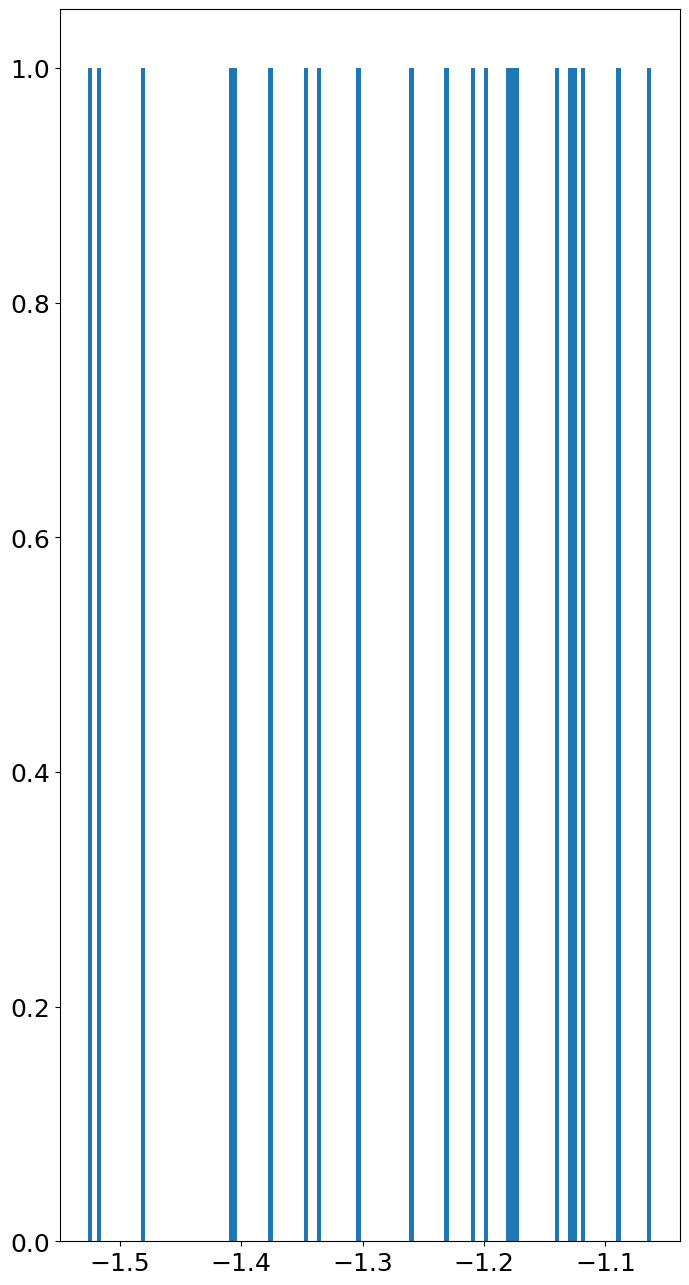

In [52]:
V2 = np.real(np.reshape(Phi[:,1],(2,11)))

plt.hist(V2.reshape(-1),128)
plt.show()